count    8835.00
mean        0.00
std         1.00
min        -0.73
25%        -0.59
50%        -0.38
75%        -0.02
max         4.59
dtype: float64


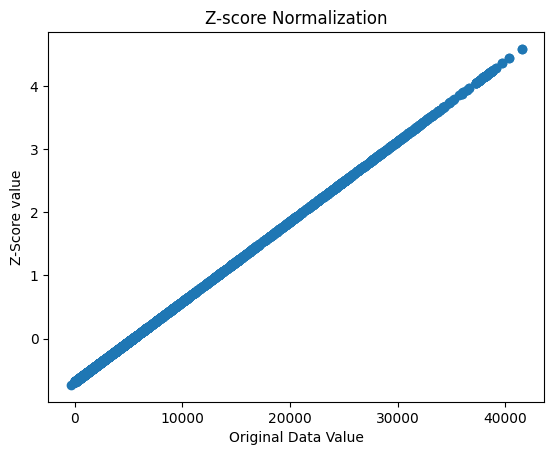

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('updated.csv')
data_val = data['Data_value']

# Calculating mean.
n = len(data_val)
m = data_val.sum()
mean = m / n

#fill the empty values with mean.
data_val.fillna(mean,axis=0,inplace=True)

# Calculating standardization using variance.
num=0
for i in range(n):
    num = num + ((data_val.iloc[i] - mean) ** 2)
variance = num / n
std = variance ** .5

# Apllying Z-score Normalization.
z_values = []
for i in range(n):
     z_value = (data_val.iloc[i] - mean)/ std
     z_values.append(z_value)

a = pd.Series(z_values)
print(a.describe().round(2))

plt.scatter(data_val,z_values)
plt.xlabel("Original Data Value")
plt.ylabel("Z-Score value")
plt.title("Z-score Normalization")
plt.show()
# because our max value is 4.59 it means there is an outlier in our data

count    8835.00
mean       -0.00
std         1.00
min        -0.74
25%        -0.59
50%        -0.39
75%        -0.02
max         4.58
Name: z_values, dtype: float64


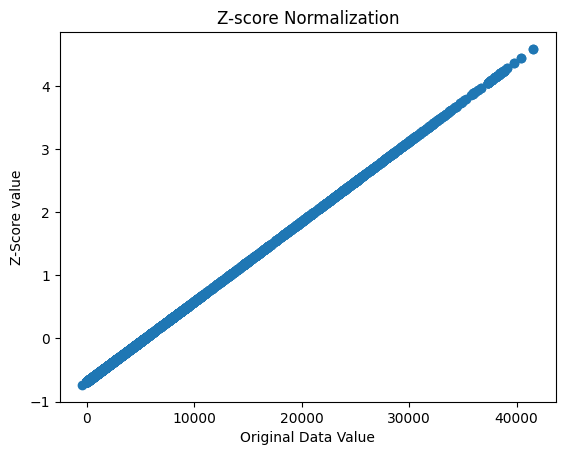

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('updated.csv')
data_val = data['Data_value']

data_val.fillna(data_val.mean(),axis = 0,inplace = True)
#data_val.info()

scaler = StandardScaler()
z_values = scaler.fit_transform(data_val.values.reshape(-1,1))
z_values = z_values.flatten()

data['z_values'] = z_values
print(data['z_values'].describe().round(2))

plt.scatter(data_val,z_values)
plt.xlabel("Original Data Value")
plt.ylabel("Z-Score value")
plt.title("Z-score Normalization")
plt.show()
# because our max value is 4.59 it means there is an outlier in our data

count    8835.00
mean        0.14
std         0.19
min         0.00
25%         0.03
50%         0.07
75%         0.13
max         1.00
Name: normalize_value, dtype: float64


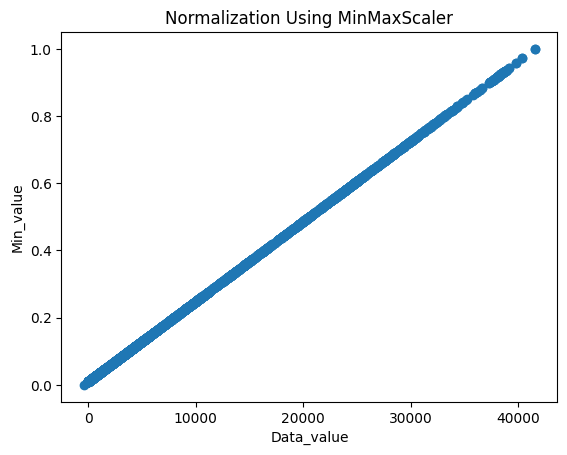

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

data = pd.read_csv('updated.csv')
data_val = data['Data_value']

data_val.fillna(data_val.mean(),inplace = True)
#data_val.info()

scaler = MinMaxScaler()
min_value = scaler.fit_transform(data_val.values.reshape(-1,1))

data['normalize_value'] = min_value
print(data['normalize_value'].describe().round(2))

plt.scatter(data_val,min_value)
plt.xlabel('Data_value')
plt.ylabel('Min_value')
plt.title('Normalization Using MinMaxScaler')
plt.show()




count    8835.00
mean        0.14
std         0.19
min         0.00
25%         0.03
50%         0.07
75%         0.13
max         1.00
Name: normalize_value, dtype: float64


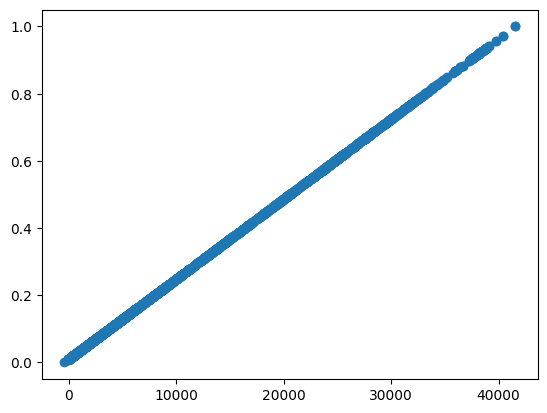

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('updated.csv')
data_val = data['Data_value']
data_val.fillna(data_val.mean(),inplace = True)

min_val = data_val.min()
max_val = data_val.max()

normalize_value = []
for i in range(len(data_val)):
  value = (data_val.iloc[i] - min_val) / (max_val - min_val)
  normalize_value.append(value)

data['normalize_value'] = normalize_value
print(data['normalize_value'].describe().round(2))

plt.scatter(data_val,normalize_value)
plt.show()

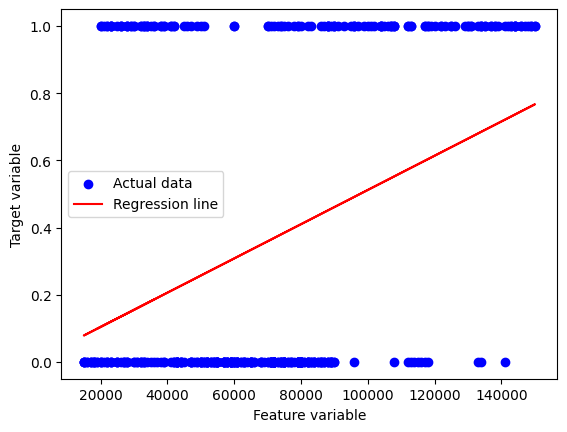

In [ ]:
import pandas as pd
import matplotlib.pyplot as  plt
from sklearn.linear_model import LinearRegression

data = pd.read_excel('Social_Network.xlsx')
x = data.iloc[:,[3]]
y = data.iloc[:,4]

model = LinearRegression()
model.fit(x,y)

y_pred = model.predict(x)

plt.scatter(x,y, color='blue', label='Actual data')
plt.plot(x,y_pred,color='red',label='Regression line')
plt.xlabel('Feature variable')
plt.ylabel('Target variable')
plt.legend()
plt.show()

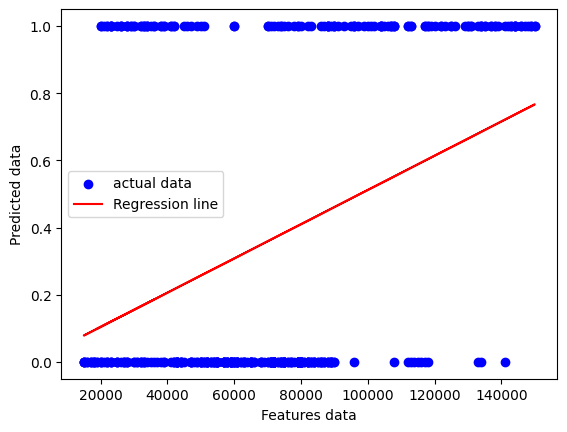

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_excel('Social_Network.xlsx')
x = data.iloc[:,3]
y = data.iloc[:,4]

mean_x = x.mean()
mean_y = y.mean()

numerator = 0
denominator = 0
for i in range(len(x)):
  numerator += (x[i]-mean_x)*(y[i]-mean_y)
  denominator += (x[i]-mean_x)** 2

B1 = numerator/denominator
B0 = mean_y-(B1*mean_x)

y_pred = B0 + B1*x

plt.scatter(x,y,color='blue',label='actual data')
plt.plot(x,y_pred,color='red',label='Regression line')
plt.xlabel('Features data')
plt.ylabel('Predicted data')
plt.legend()
plt.show()



Original Shape (545, 13)
After removing the outlier (237, 13)


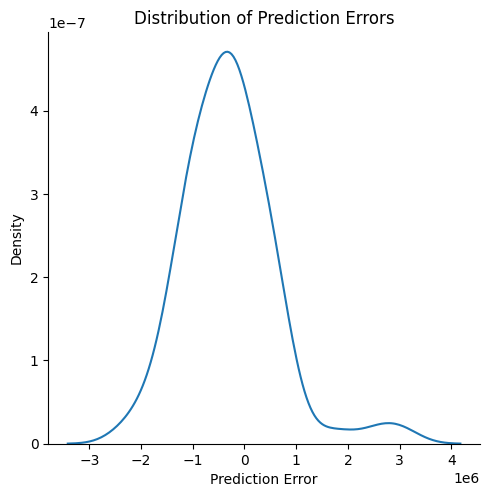

R2 score 0.4093646275718167


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.metrics import r2_score

df = pd.read_csv('Housing.csv')
#print(df)
#print(df.shape)
#print(df.info())

#used for the categorical data to change into the numeric.
label = LabelEncoder()
categorical_data = ['mainroad','guestroom','basement','hotwaterheating'
,'airconditioning','prefarea','furnishingstatus']
for i in categorical_data:
  df[i] = label.fit_transform(df[i])
#print(df.dtypes)

#removing the outliers using IQR method.
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1

lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR

no_outlier = df[~((df<lower)|(df>upper)).any(axis=1)]
print("Original Shape",df.shape)
print("After removing the outlier",no_outlier.shape)
# to ckeck if the outlier is still present or not.
# no_outlier.boxplot(figsize=(12,6))
# plt.xticks(rotation=45)
# plt.title('Boxplot to Detect Outliers')
# plt.show()

#collecting the features(x) and target variable(y).
features = no_outlier.drop(columns='price')
target = no_outlier['price']

# apply the standardization.
scaler = StandardScaler()
z_values = scaler.fit_transform(features)
#print(z_values)
x = pd.DataFrame(z_values,columns=features.columns)
y = target
#print(data.describe().round(2))
#print(data.head())

# #apply normalization.
# min_value = MinMaxScaler()
# min_values = min_value.fit_transform(features)
# #print(min_values)
# x = pd.DataFrame(min_values,columns = features.columns)
# y = target
# # print(min_data.describe().round(2))
# # print(min_data.head())

model = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
#print(y_pred)

error = y_test - y_pred
sns.displot(error,kind='kde')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error")
plt.ylabel("Density")
plt.show()

score = r2_score(y_test,y_pred)
print("R2 score",score)


Original Shape (545, 13)
After removing the outlier (237, 13)


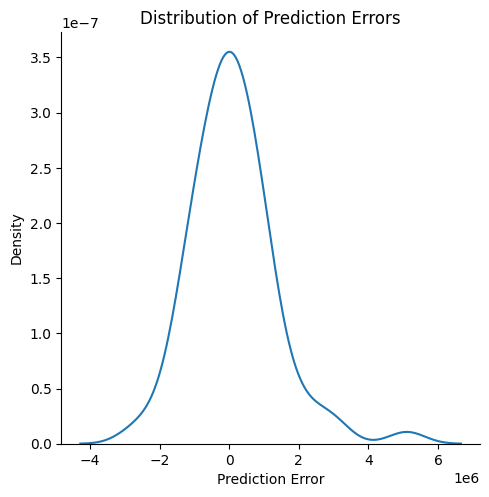

R2 value  0.24012592699202528


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder,MinMaxScaler
from sklearn.metrics import r2_score

df = pd.read_csv('Housing.csv')

#used for the categorical data to change into the numeric.
label = LabelEncoder()
categorical_data = ['mainroad','guestroom','basement','hotwaterheating'
,'airconditioning','prefarea','furnishingstatus']
for i in categorical_data:
  df[i] = label.fit_transform(df[i])

#removing the outliers using IQR method.
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1

lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR

data = df[~((df<lower)|(df>upper)).any(axis=1)]
print("Original Shape",df.shape)
print("After removing the outlier",data.shape)

#collecting the features(x) and target variable(y).
features = data.drop(columns='price')
target = data['price']

#apply normalization.
min_value = MinMaxScaler()
min_values = min_value.fit_transform(features)
x = pd.DataFrame(min_values,columns=features.columns)
y = target

#apply polynomial features or regression
poly = PolynomialFeatures(degree=2)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=45)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

model = LinearRegression()
model.fit(x_train_poly,y_train)

y_pred = model.predict(x_test_poly)
error = y_test - y_pred
sns.displot(error,kind='kde')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error")
plt.ylabel("Density")
plt.show()

score = r2_score(y_test,y_pred)
print("R2 value ",score)


Original Shape (545, 13)
After removing the outlier (237, 13)


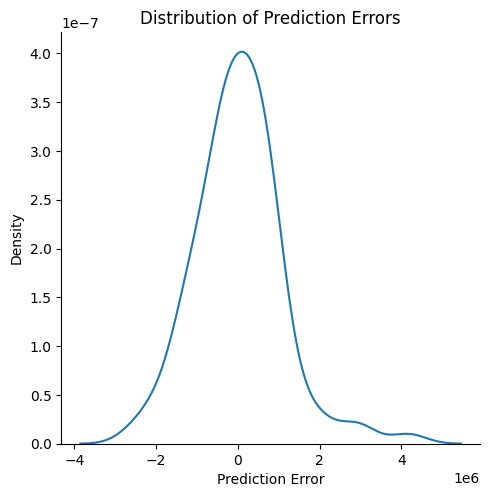

R2 value  0.3511761827554075


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv('Housing.csv')

label = LabelEncoder()
categorical_data = ['mainroad','guestroom','basement','hotwaterheating'
,'airconditioning','prefarea','furnishingstatus']
for i in categorical_data:
  df[i] = label.fit_transform(df[i])

#removing the outliers using IQR method.
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1

lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR

data = df[~((df<lower)|(df>upper)).any(axis=1)]
print("Original Shape",df.shape)
print("After removing the outlier",data.shape)

#collecting the features(x) and target variable(y).
features = data.drop(columns='price')
target = data['price']

#apply standardization.
scaler = StandardScaler()
z_values = scaler.fit_transform(features)
x = pd.DataFrame(z_values,columns=features.columns)
y = target

#apply ridge regression.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=45)
model = Ridge(alpha=0.0001)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
error = y_test - y_pred
sns.displot(error,kind='kde')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error")
plt.ylabel("Density")
plt.show()

score = r2_score(y_test,y_pred)
print("R2 value ",score)


Original Shape (545, 13)
After removing the outlier (237, 13)


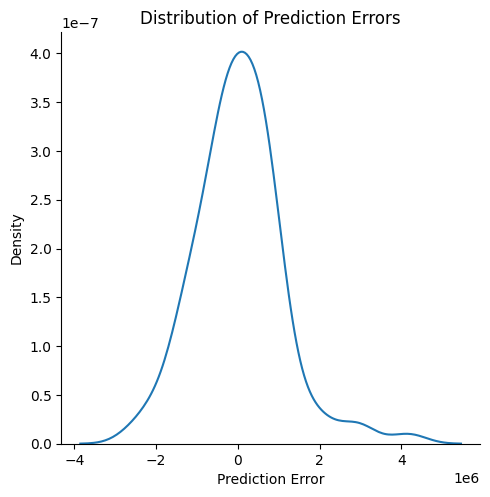

R2 value  0.351176084352101


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv('Housing.csv')

label = LabelEncoder()
categorical_data = ['mainroad','guestroom','basement','hotwaterheating'
,'airconditioning','prefarea','furnishingstatus']
for i in categorical_data:
  df[i] = label.fit_transform(df[i])

#removing the outliers using IQR method.
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1

lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR

data = df[~((df<lower)|(df>upper)).any(axis=1)]
print("Original Shape",df.shape)
print("After removing the outlier",data.shape)

#collecting the features(x) and target variable(y).
features = data.drop(columns='price')
target = data['price']

#apply standardization.
scaler = StandardScaler()
z_values = scaler.fit_transform(features)
x = pd.DataFrame(z_values,columns=features.columns)
y = target

#apply lasso regression.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=45)
model = Lasso(alpha=0.15)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
error = y_test - y_pred
sns.displot(error,kind='kde')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error")
plt.ylabel("Density")
plt.show()

score = r2_score(y_test,y_pred)
print("R2 value ",score)
